# Example `fdesign` GPR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from empymod import dipole, utils
from empyscripts import fdesign

# Set minimum offset to 1e-20
# empymod version 1.4.5 or higher is required!
utils.set_minimum(min_off=1e-20)

%matplotlib inline
plt.style.use('seaborn-notebook')

## $f_I$, $f_C$ (same)

In [2]:
model = {
    'zsrc': 0,
    'zrec': 1,
    'res': 200,
    'aniso': 1,
    'freqtime': 500e6,
    'epermH': 10,
    'epermV': 10,
    'mpermH': 1,
    'mpermV': 1,
}

## Calculation

* QC: Input transform-pairs:
  fC: x-range defined through `n`, `spacing`, `shift`, and `r`-parameters; b-range defined through `r`-parameter.
  fI: x- and b-range defined through `n`, `spacing`, `shift`, and `r_def`-parameters.


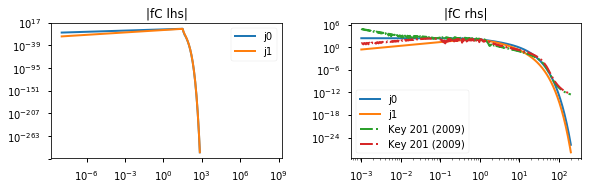

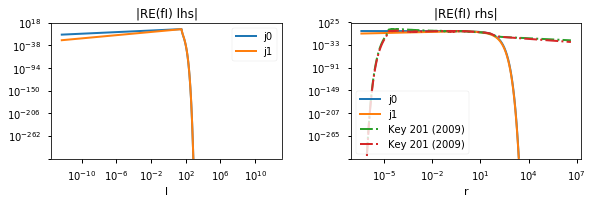

   brute fct calls : 100    

   Filter length   : 2001
   Best filter
   > Max r         : 4.8481
   > Spacing       : 0.008222222222
   > Shift         : 0.6666666667
   > Base min/max  : 5.231954e-04 / 7.250958e+03

:: empymod END; runtime = 0:09:46.130780 :: 

* QC: Overview of brute-force inversion:


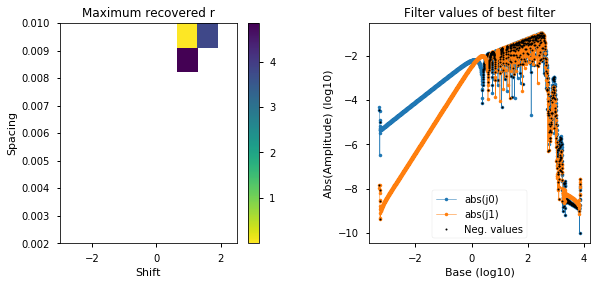

* QC: Inversion result of best filter (minimum amplitude):


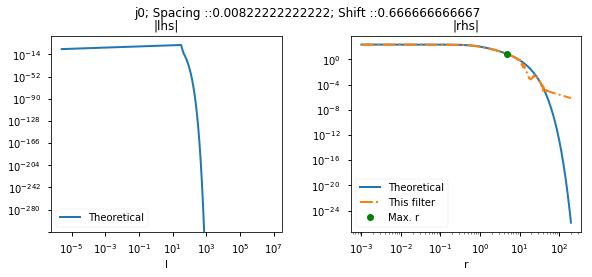

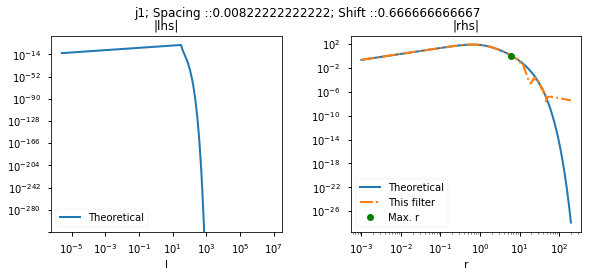

In [3]:
inp = {'spacing': (0.002, .01, 10),
       'shift': (-3, 2.5, 10),
       'r': np.logspace(-3, 2.3, 500),  # -3 to 2.3: Ensure very small offsets are covered while maximising big offsets
       'r_def': (1, 1, 2),
       'full_output': True, #       'finish': True,
       'cvar': 'r',
       'save': True,
       'fI': fdesign.empy_hankel(['j0', 'j1'], **model)}
#filt, out = fdesign.design(n=2001, name='wer2001-check', plot=2, **inp)
filt, out = fdesign.load_filter('wer2001-check', True)
fdesign.plot_result(filt, out, 'r', True)

   Filter length   : 2001
   Best filter
   > Max r         : 5.21717
   > Spacing       : 0.007945895293
   > Shift         : 0.6597618361
   > Base min/max  : 6.849714e-04 / 5.462474e+03


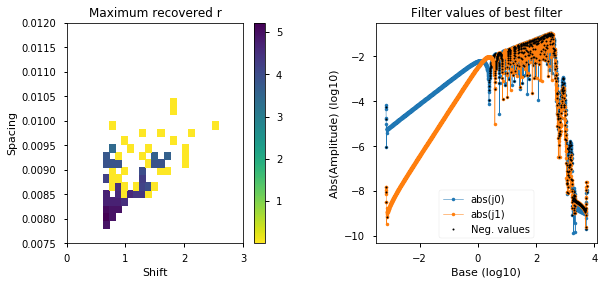

In [4]:
inp = {'spacing': (0.0075, .012, 30),
       'shift': (0, 3, 30),
       'r': np.logspace(-3, 2.3, 500),  # -3 to 2.3: Ensure very small offsets are covered while maximising big offsets
       'r_def': (1, 1, 2),
       'full_output': True,
       'finish': True,
       'cvar': 'r',
       'save': True,
       'fI': fdesign.empy_hankel(['j0', 'j1'], **model)}
# filt, out = fdesign.design(n=2001, name='wer2001', plot=2, **inp)
filt, out = fdesign.load_filter('wer2001', True)
fdesign.plot_result(filt, out, 'r', True)

## Plot all frequencies, fixed offset

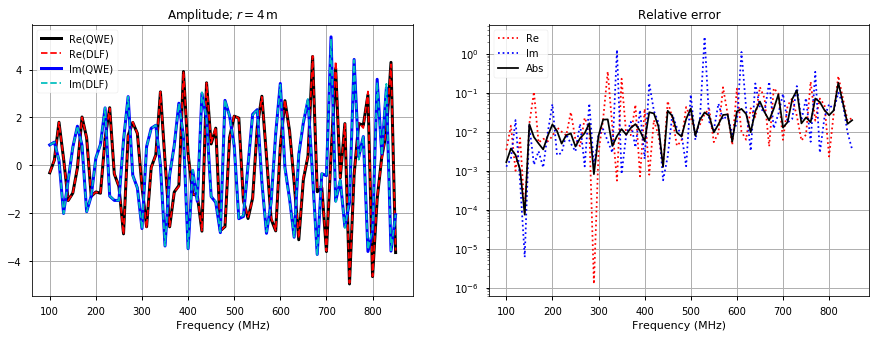

In [5]:
f = np.arange(10, 85+1)*1e7
inp1 = {
    'src': [0, 0, 0.0000001],
    'rec': [4, 0, 0.5], 
    'depth': [0, 1],
    'res': [2e14, 200, 20] ,
    'ab': 11,
    'freqtime': f,
    'epermH': [1, 9, 15],
    'epermV': [1, 9, 15],
    'verb': 1,
}

dlf = dipole(htarg=filt, xdirect=False, **inp1)
qwe = dipole(ht='qwe', htarg=[1e-8, 1e-15, '', 200, 200, 60, 1e-6, 160, 4000], **inp1)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.grid('on')
plt.title(r'Amplitude; $r=4\,$m')
plt.plot(f/1e6, qwe.real, 'k', lw=3, label='Re(QWE)')
plt.plot(f/1e6, dlf.real, 'r--', label='Re(DLF)')
plt.plot(f/1e6, qwe.imag, 'b', lw=3, label='Im(QWE)')
plt.plot(f/1e6, dlf.imag, 'c--', label='Im(DLF)')
plt.xlabel('Frequency (MHz)')
plt.legend()

plt.subplot(122)
plt.grid('on')
plt.title('Relative error')
plt.semilogy(f/1e6, np.abs((dlf.real-qwe.real)/qwe.real), 'r:', label='Re')
plt.semilogy(f/1e6, np.abs((dlf.imag-qwe.imag)/qwe.imag), 'b:', label='Im')
plt.semilogy(f/1e6, np.abs((dlf-qwe)/qwe), 'k', label='Abs')
plt.legend()
plt.xlabel('Frequency (MHz)')

plt.show()

## Plot full offset range, fixed frequency

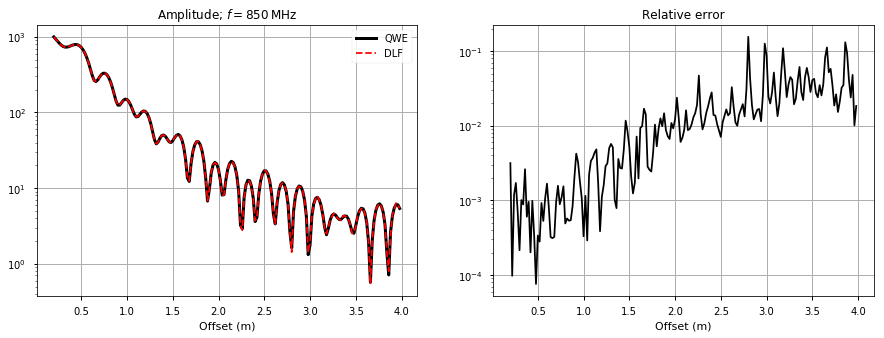

In [6]:
x = np.arange(10, 200)*.02
inp2 = {
    'src': [0, 0, 0.0000001],
    'rec': [x, x*0, 0.5], 
    'depth': [0, 1],
    'res': [2e14, 200, 20] ,
    'ab': 11,
    'freqtime': 850e6,
    'epermH': [1, 9, 15],
    'epermV': [1, 9, 15],
    'verb': 1,
}

dlf = dipole(htarg=filt, xdirect=False, **inp2)
qwe = dipole(ht='qwe', htarg=[1e-8, 1e-15, '', 200, 200, 60, 1e-6, 160, 4000], **inp2)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.grid('on')
plt.title(r'Amplitude; $f=850\,$MHz')

plt.semilogy(x, np.abs(qwe), 'k', lw=3, label='QWE')
plt.semilogy(x, np.abs(dlf), 'r--', label='DLF')
plt.legend()
plt.xlabel('Offset (m)')

plt.subplot(122)
plt.grid('on')
plt.title('Relative error')
plt.semilogy(x, np.abs((dlf-qwe)/qwe), 'k')
plt.xlabel('Offset (m)')

plt.show()

In [7]:
import printinfo
printinfo.info()